# Machine Learning Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('training_set.csv', na_values=['','NA'],keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X = df.drop(columns=['Id','SalePrice'])
Y = df[['SalePrice']]

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [9]:
# Seperate cat and con features for X
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [14]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='Not_Avail')),
                            ('ordinal', OrdinalEncoder())])

In [15]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [16]:
X_pre = pre1.fit_transform(X)

In [17]:
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr = LinearRegression()
sel = SequentialFeatureSelector(estimator=lr, n_features_to_select='auto', direction='backward')
sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols


array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__LowQualFinSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__YrSold',
       'cat__MSZoning', 'cat__LandContour', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__MasVnrType', 'cat__ExterQual', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__GarageFinish',
       'cat__GarageCond', 'cat__PavedDrive', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [19]:
len(sel_cols)

40

In [20]:
sel_cols[0]

'num__MSSubClass'

In [21]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [22]:
imp_cols=[]
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [23]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'MSZoning',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [24]:
X_sel = X[imp_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,GarageFinish,GarageCond,PavedDrive,MiscFeature,SaleCondition
0,60,8450,7,5,2003,196.0,706,0,150,856,...,TA,No,Ex,Gd,Typ,RFn,TA,Y,NaN,Normal
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,TA,Gd,Ex,TA,Typ,RFn,TA,Y,NaN,Normal
2,60,11250,7,5,2001,162.0,486,0,434,920,...,TA,Mn,Ex,Gd,Typ,RFn,TA,Y,NaN,Normal
3,70,9550,7,5,1915,0.0,216,0,540,756,...,Gd,No,Gd,Gd,Typ,Unf,TA,Y,NaN,Abnorml
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,TA,Av,Ex,Gd,Typ,RFn,TA,Y,NaN,Normal


## Final pipeline with OneHotEncoder

In [25]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [26]:
cat_sel

['MSZoning',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [27]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold']

In [28]:
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__LowQualFinSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__YrSold',
       'cat__MSZoning', 'cat__LandContour', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__MasVnrType', 'cat__ExterQual', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__GarageFinish',
       'cat__GarageCond', 'cat__PavedDrive', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [31]:
cat_Pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='Not_Avail')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [32]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_Pipe2, cat_sel)]).set_output(transform='pandas')

In [33]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'Garage...
                                                  SimpleImputer(fill_value='Not_Avail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'LandContour', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageFinish',
                                  'GarageCond', 'PavedDrive', 'MiscFeature',
                                  'SaleCondition'])])

In [34]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train,Test, Split

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre,Y, test_size=0.2,random_state=20)

In [36]:
xtrain.shape

(1168, 140)

In [37]:
xtest.shape

(292, 140)

In [38]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
1137,-0.163109,-0.418410,-0.795151,2.179628,-3.188461,-0.570750,-0.973018,-0.288653,0.481666,-0.632599,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1335,-0.872563,-0.086875,-0.071836,-0.517200,0.189854,1.421839,0.531560,-0.288653,0.219054,0.667124,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
459,-0.163109,-0.350960,-0.795151,-1.416142,-0.704406,0.320380,-0.567265,-0.288653,-0.097892,-0.794494,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
115,2.438219,-0.730301,-0.071836,-0.517200,0.918511,5.678230,-0.054041,-0.288653,-0.582367,-0.748890,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
908,-0.872563,-0.163545,-0.795151,-0.517200,0.388579,-0.570750,-0.312846,1.720475,-0.743103,-0.441061,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
ytrain.head()

,SalePrice
1137,94000
1335,167900
459,110000
115,176000
908,131000


In [40]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
954,0.782828,-0.111931,-0.071836,-0.517200,0.123613,0.812992,1.099614,-0.288653,-1.284176,-0.256363,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
326,1.492282,0.032990,1.374795,-0.517200,0.719786,-0.570750,2.577873,-0.288653,-1.057786,1.508523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
308,-0.636078,0.182922,-1.518467,-0.517200,-1.035613,-0.570750,-0.398384,-0.288653,0.071901,-0.447901,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1058,0.073375,0.079293,2.098110,-0.517200,1.216598,0.281635,1.079875,-0.288653,-0.903840,0.106191,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416,0.073375,-0.267876,-0.071836,1.280685,0.222975,0.552849,-0.514626,-0.288653,-0.235990,-0.878862,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
ytest.head()

,SalePrice
954,127500
326,324000
308,82500
1058,335000
416,149500


## Build the model

In [42]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [43]:
model1.score(xtrain, ytrain)

0.9075907595657461

In [44]:
model1.score(xtest, ytest)

-113654745654107.84

In [45]:
from sklearn.linear_model import Ridge
model1 = Ridge(alpha=1)
model1.fit(xtrain, ytrain)

Ridge(alpha=1)

In [46]:
model1.score(xtrain, ytrain)

0.8996839313326213

In [47]:
model1.score(xtest, ytest)

0.874325901840236

In [48]:
import numpy as np
params = {'alpha':np.arange(1,1000,1)}
params

{'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [49]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Ridge
rr = Ridge()
gscv_ridge = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [50]:
gscv_ridge.best_params_

{'alpha': 1}

In [51]:
gscv_ridge.best_score_

-1034400513.9065071

In [52]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=1)

In [53]:
best_ridge.score(xtrain, ytrain)

0.8996839313326213

In [54]:
best_ridge.score(xtest, ytest)

0.874325901840236

In [55]:
from sklearn.linear_model import Lasso
ls = Lasso()
gscv_lasso = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [56]:
gscv_lasso.best_params_

{'alpha': 48}

In [57]:
gscv_lasso.best_score_

-983480039.2036304

In [58]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=48)

In [59]:
best_lasso.score(xtrain, ytrain)

0.9050404238891553

In [60]:
best_lasso.score(xtest, ytest)

0.8870671276704322

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'R2 Score : {r2:.4f}')

In [63]:
print('Ridge Model Results :/n')
print('Train Results')
evaluate_model(best_ridge, xtrain, ytrain)
print('/n=================================/n')
print('Test Results')
evaluate_model(best_ridge, xtest, ytest)

Ridge Model Results :/n
Train Results
Mean Squared Error : 618791801.64
Root Mean Squared Error : 24875.53
Mean Absolute Error : 15582.91
R2 Score : 0.8997
/n=================================/n
Test Results
Mean Squared Error : 861615651.38
Root Mean Squared Error : 29353.29
Mean Absolute Error : 16929.18
R2 Score : 0.8743


In [64]:
print('Lasso Model Results :/n')
print('Train Results')
evaluate_model(best_lasso, xtrain, ytrain)
print('/n======================================/n')
print('Test Results')
evaluate_model(best_lasso,xtest, ytest)

Lasso Model Results :/n
Train Results
Mean Squared Error : 585750697.42
Root Mean Squared Error : 24202.29
Mean Absolute Error : 15021.90
R2 Score : 0.9050
/n======================================/n
Test Results
Mean Squared Error : 774262411.90
Root Mean Squared Error : 27825.57
Mean Absolute Error : 15953.46
R2 Score : 0.8871


In [65]:
from sklearn.model_selection import cross_val_score
scores_ridge = cross_val_score(best_ridge, xtrain, ytrain, cv=5, scoring='r2')
scores_ridge

array([0.81323527, 0.86447117, 0.86864588, 0.88320667, 0.71771182])

In [66]:
scores_ridge.mean()

0.8294541603468687

In [67]:
scores_lasso = cross_val_score(best_lasso,xtrain, ytrain,cv=5, scoring='r2')
scores_lasso

array([0.78378674, 0.88025282, 0.89295873, 0.89616572, 0.72804161])

In [68]:
scores_lasso.mean()

0.8362411230492144

### Sample Prediction


In [69]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [70]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'Garage...
                                                  SimpleImputer(fill_value='Not_Avail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'LandContour', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageFinish',
                                  'GarageCond', 'PavedDrive', 'MiscFeature',
                                  'SaleCondition'])])

In [71]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
preds = best_lasso.predict(xnew_pre)
preds

array([117032.04836382, 155357.84619885, 174194.59952487, ...,
       165466.75660586, 111172.69565807, 220220.09081155])

In [73]:
df_results = xnew[['Id']]
df_results

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [74]:
df_results['SalePrice_pred'] = preds

In [75]:
df_results

,Id,SalePrice_pred
0,1461,117032.048364
1,1462,155357.846199
2,1463,174194.599525
3,1464,192203.937714
4,1465,219168.393263
...,...,...
1454,2915,82779.930601
1455,2916,69541.348098
1456,2917,165466.756606
1457,2918,111172.695658


<Axes: xlabel='SalePrice_pred', ylabel='Count'>

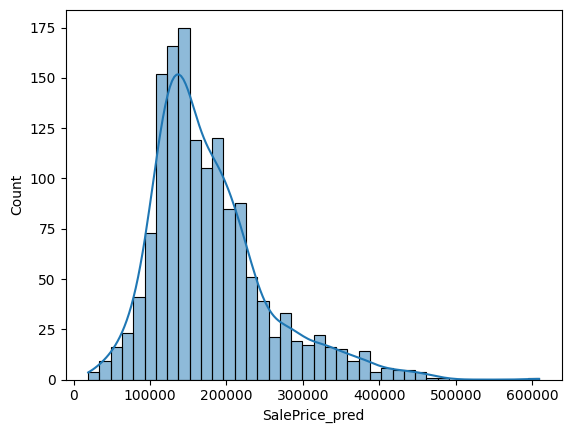

In [76]:
import seaborn as sns
sns.histplot(data=df_results, x='SalePrice_pred', kde=True)


In [77]:
df_results.to_csv('Results.csv', index=False)